ESTIMACIÓN DE LA CURVA CARACTERÍSTICA DE POTENCIAL PARA UN DETECTOR DE RADIACIÓN CHERENCOV EN AGUA (WCD)

In [1]:
import bz2 
from scipy.stats import norm
import matplotlib.pyplot as pl 
import numpy as np

In [2]:
matrix_data = []
vec_data = []
cont = 0
cont2 = 0
with bz2.open( "chitaga.dat.bz2", "rt" ) as bz_file:
    for line in bz_file: #se lee linea a linea del archivo         
        rline = line.rstrip('\n').split(' ') #se desconcatena
        cont += 1
        if cont > 49: #justo ene sa linea los datos siguen una estructura secuencial
            if rline[0] == "#":
                if len(rline) == 3: ##fin de linea de pulso
                    n = 0
                if len(rline) == 4:
                    if n == 12:
                        #print('Funciona') 
                        matrix_data.append(vec_data) #se va guardando en la matriz de datos
                        vec_data = [] #se reinicializa el vector 
                        #break
                    else:
                        vec_data = [] # en caso de estar incompleto el vector, no se guarda
                        # pero si se inicializa                        
            else:                
                n += 1
                cont2 += 1
                vec_data.append(int(rline[0]))
                #if cont2 == 50:
                 #   #print(vec_data)
                  #  break
ml = np.asarray(matrix_data)-50 #resto el valor del offset de la electrónica del detector
ml = ml 
x_num_fil, y = ml.shape
print(ml.shape)

(749600, 12)


In [3]:
print(x_num_fil) ## numero 

749600


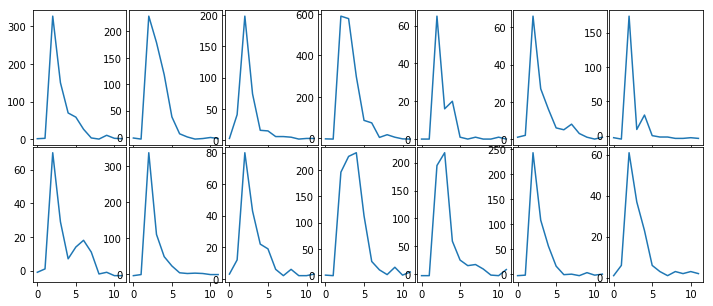

Pulsos de verificacion de data- Aleatorios


In [4]:
#print(ml)
t = np.linspace(0,12*25,12)
np.random.seed()
rand_14 = np.random.randint(0, ml.shape[0],14) #selecciono 14 datos aleaorios
#print(rand_14)
pulsos_ejemplo = ml[rand_14][:]
num_rows, num_cols = 2, 7
f, ax = pl.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
squeeze=True)
#print(pulsos_ejemplo)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("on")
        ax[r,c].plot(pulsos_ejemplo[image_index][:])
        #ax[r,c].set_title('Pulso No. %d' % s[image_index])


pl.show()
print('Pulsos de verificacion de data- Aleatorios')

In [5]:
# calculo de los valores de carga para cada pulso
Q = np.zeros([x_num_fil,1],dtype = float)
for h in range(x_num_fil):
    Q[h] = sum(ml[h][:])
Q = Q

In [6]:
#se verifica que la integral corresponda al valor del vector, y sin los valores del offset
print('--vector = ',ml[0],' --Integral= ',Q[0])

--vector =  [ 1  0 84  9  2  2  0  2  1  2  0  1]  --Integral=  [104.]


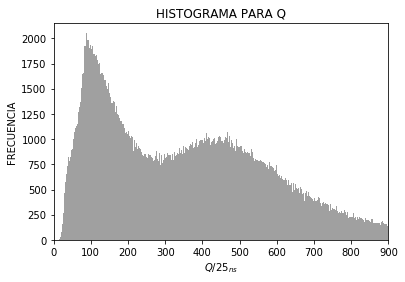

In [8]:
maximo = int(np.amax(Q))
frec, bins1 ,patches = pl.hist(Q, bins = maximo,range= (0, maximo), facecolor='gray', alpha=0.75)
pl.title('HISTOGRAMA PARA Q')
pl.ylabel('FRECUENCIA')
pl.xlabel('$Q/25_{ns}$')
pl.xlim(0,900) #se ajusta el eje x para visualizar la parte del histograma que interesa analizar
pl.show()

In [9]:
print(bins1)

[0.000e+00 1.000e+00 2.000e+00 ... 6.180e+03 6.181e+03 6.182e+03]


para analizar la data, extraigo un vector de los bins del histograma para realizar el fit de la gausiana

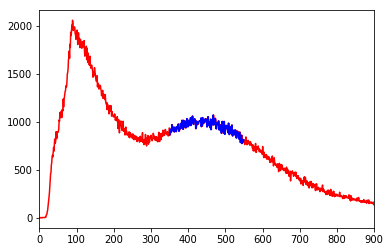

In [10]:
from scipy.stats import norm
import matplotlib.mlab as mlab
xmax = 550
xmin = 350
#vec_fit = bins[100:200] # solo se usa para garantizar encontrar el valor maximo del segundo pico
pl.plot(bins1[1:],frec,color = 'red')
pl.plot(bins1[xmin:xmax], frec[xmin:xmax],color = 'blue')
pl.xlim(0,900)
pl.show()

/home/usuario/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


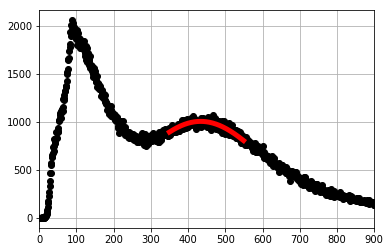

media = 433.9; sigma = 173.0


In [11]:
from pylab import plot, show, xlim, ylim, grid, exp
from scipy.optimize import leastsq
import random


fitfunc = lambda p, x: p[0]*exp(-0.5*((x-p[1])*p[2])*((x-p[1])*p[2]))
errfunc = lambda p, x, y: (y - fitfunc(p, x))

init = [1.e3, 450., 1.]

out = leastsq(errfunc, init, args=(bins1[xmin:xmax], frec[xmin:xmax]))
c = out[0]


plot(bins1[1:],frec,'ko')

plot(bins1[xmin:xmax], fitfunc(c, bins1[xmin:xmax]), 'r-', linewidth=5 )

xlim(1, 900)
grid("on")

show()
sigma = abs(1./c[2])
media = c[1]
print('media = %0.1f; sigma = %0.1f' % (c[1], abs(1./c[2])) )



Con el valor de la media y la desviación estandar se procede a determinar el rango en el eje de Q para determinar el intervalo que corresponde a la energía media de un muon.

In [12]:
pulso_medio = np.zeros(12,dtype = float)
N_mu = 0 ##contador de muones 
for yy in range(len(Q)):
    if Q[yy] > media-sigma/2 and Q[yy] < media+sigma/2:
        pulso_medio +=ml[yy] 
        N_mu += 1
pulso_medio = pulso_medio/N_mu


Número de Muones Contados=  166737


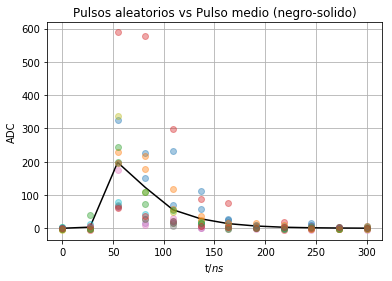

In [13]:
# se compara el pulso medio, con los pulsos aleatorios de la entrada y se comprueba si hay algún muon en esa muestra
pl.plot(t,pulso_medio,color = 'k')
for rr in range(14):
    pl.plot(t,pulsos_ejemplo[rr],'o', alpha = 0.4) 
    

pl.title('Pulsos aleatorios vs Pulso medio (negro-solido)')
pl.grid('on')
pl.xlabel('t/$ns$')
pl.ylabel('ADC')
print('Número de Muones Contados= ', N_mu)
pl.show()

In [14]:
veri = frec[xmin:xmax]
integral = sum(veri)
print('Numero de Muones = ', integral)

Numero de Muones =  189396.0


[5.28752622 4.80942044 4.01758919 3.34896962 2.62983452]
Chi cuadrado: 0.9790869504487992
intercepto: 2.0639497594270635
Pendiente: [-0.00644887]
Tau:  105.065900 ns


/home/usuario/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


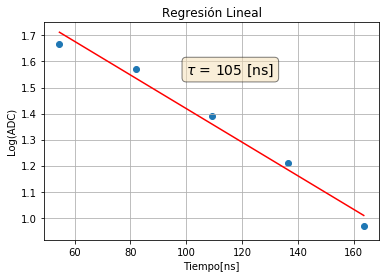

In [15]:
### regresión
func_y = np.log(pulso_medio[2:7])
func_x = t[2:7]

from sklearn.linear_model import LinearRegression

x1 = func_x
x = x1.reshape((-1, 1))
y = func_y
print(y)
yy =np.log(y)
modelo = LinearRegression()
modelo.fit(x, yy)
modelo = LinearRegression().fit(x, yy)
r_sq = modelo.score(x, yy)

print('Chi cuadrado:', r_sq)
print('intercepto:', modelo.intercept_) ###intercepto eje y 
print('Pendiente:', modelo.coef_) ### pendiente del modelo
print('Tau:  %f ns'%((-1/modelo.coef_)-50)) 
tauu = (-1/modelo.coef_)-50
f = np.linspace(np.amin(x),np.amax(x),100)
reg = modelo.coef_*f+modelo.intercept_
pl.scatter(x,yy)
pl.plot(f,reg,color = 'red')

pl.title("Regresión Lineal")
pl.xlabel("Tiempo[ns]")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
pl.text(100, 1.6, r'$\tau$ = %d [ns]' %(tauu), fontsize=14,verticalalignment='top', bbox=props)



pl.ylabel("Log(ADC)")
pl.grid('on')
pl.show()

In [16]:
# cociente
coef_ref = pulso_medio[6]/pulso_medio[2] #en el bin 2 se encuentra el ajuste de trigger de la electrónica
print('Coef_ref = ',coef_ref)
coef_ref1 = pulso_medio[7]/pulso_medio[2]
print('Coef_ref1 = ',coef_ref1)
coef_ref2 = pulso_medio[5]/pulso_medio[2]
print('Coef_ref2 = ',coef_ref2)

Coef_ref =  0.07010986957720278
Coef_ref1 =  0.034055798033542695
Coef_ref2 =  0.14391152233448495


In [17]:
delta = 0.03
pulso_medio_1 = np.zeros(12,dtype = float)
matrix_data_1 = []
N_mu2 = 0 ##contador de muones 
for tt in range(len(Q)): #filtro usando razón entre los valores de las posicion 
    kll = ml[tt] 
    compare = kll[6]/kll[2]
    if compare > coef_ref-delta and compare < coef_ref+delta:
        pulso_medio_1 +=ml[tt] 
        matrix_data_1.append(ml[tt])
        N_mu2 += 1
#pulso_medio = pulso_medio/N_mu
ml_2 = np.asarray(matrix_data_1)
print('Muones Contados= ',N_mu2)



Muones Contados=  239151


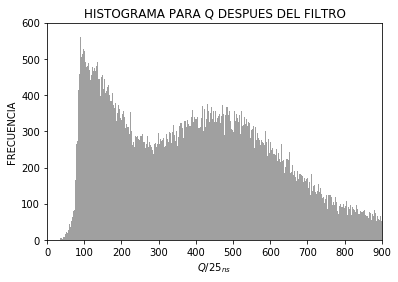

In [18]:
# calculo de los valores de carga para cada pulso
Q1 = np.zeros([N_mu2,1],dtype = float)
for f in range(N_mu2):
    Q1[f] = sum(ml_2[f][:])
maximo_1 = int(np.amax(Q1))
frec_1, bins1_1 ,patches = pl.hist(Q1, bins = maximo_1,range= (0, maximo_1), facecolor='gray', alpha=0.75)
pl.title('HISTOGRAMA PARA Q DESPUES DEL FILTRO')
pl.ylabel('FRECUENCIA')
pl.xlabel('$Q/25_{ns}$')
pl.xlim(0,900) #se ajusta el eje x para visualizar la parte del histograma que interesa analizar
pl.show()